### FAULTY AIR QUALITY SENSOR CHALLENGE

#### VYRODOK TEAM
School: EDSA

- Eric Mbuthia
- Linda Kelida
- Teddy Waweru
- Jessica Njuguna

# 1. EDA Process

#### Import EDA Packages

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
sns.set()

#### Import Data

In [120]:
#A00
# Load Files
raw_train_df = pd.read_csv('Challenge/data/train.csv', parse_dates=['Datetime'])
raw_test_df = pd.read_csv('Challe"nge/data/test.csv', parse_dates=['Datetime'])
raw_samp_df = pd.read_csv('Challenge/data/SampleSubmission.csv')

## Statistical Summaries

In [121]:
raw_train_df.columns, test_df.columns, samp_df.columns

(Index(['ID', 'Datetime', 'Sensor1_PM2.5', 'Sensor2_PM2.5', 'Temperature',
        'Relative_Humidity', 'Offset_fault'],
       dtype='object'),
 Index(['ID', 'Datetime', 'Sensor1_PM2.5', 'Sensor2_PM2.5', 'Temperature',
        'Relative_Humidity'],
       dtype='object'),
 Index(['ID', 'Offset_fault'], dtype='object'))

In [12]:
raw_train_df.shape, test_df.shape, raw_samp_df.shape, raw_train_df.isna().sum(), raw_test_df.isna().sum()

((297177, 7),
 (127361, 6),
 (127361, 2),
 ID                      0
 Datetime                0
 Sensor1_PM2.5        3614
 Sensor2_PM2.5        3614
 Temperature          3549
 Relative_Humidity    3549
 Offset_fault            0
 dtype: int64,
 ID                       0
 Datetime                 0
 Sensor1_PM2.5            0
 Sensor2_PM2.5            0
 Temperature          88090
 Relative_Humidity    88090
 dtype: int64)

In [122]:
raw_train_df.info(), raw_train_df.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297177 entries, 0 to 297176
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   ID                 297177 non-null  object        
 1   Datetime           297177 non-null  datetime64[ns]
 2   Sensor1_PM2.5      293563 non-null  float64       
 3   Sensor2_PM2.5      293563 non-null  float64       
 4   Temperature        293628 non-null  float64       
 5   Relative_Humidity  293628 non-null  float64       
 6   Offset_fault       297177 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 15.9+ MB


(None,
 ID                           object
 Datetime             datetime64[ns]
 Sensor1_PM2.5               float64
 Sensor2_PM2.5               float64
 Temperature                 float64
 Relative_Humidity           float64
 Offset_fault                  int64
 dtype: object)

We convert the Datetime column to datetime format, & add columns for the year, month, day & hour <br/>
We shall have this in a function so it can be reused later.

We shall declare a function that will contain these initial changes, in case we need to repeat the preparation of the dataset to contain these columns.
(May be updated with other functions)

In [112]:
#Input: Expects df similar to the original dataset
#Output: DF with the following columns:

def prepare_df(_df):

    df = _df.copy(deep=True)
    #Convert datetime format
    df['Datetime'] = pd.to_datetime(df['Datetime'])

    # Add columns for year, month, day, hour
    df['YEAR'] = pd.DatetimeIndex(df['Datetime']).year
    df['MONTH'] = pd.DatetimeIndex(df['Datetime']).month
    df['DAY'] = pd.DatetimeIndex(df['Datetime']).day
    df['HOUR'] = pd.DatetimeIndex(df['Datetime']).hour
    df['DAY_OF_WEEK'] = pd.DatetimeIndex(df['Datetime']).dayofweek
    df['HOUR_OF_WEEK'] = ((pd.DatetimeIndex(df['Datetime']).dayofweek * 24) + pd.DatetimeIndex(df['Datetime']).hour)


    #Standardize column titles
    df.rename(
        columns = {
            'Datetime': 'DATETIME', 'Sensor1_PM2.5' : 'SENSOR1_PM2.5',
            'Sensor2_PM2.5' : 'SENSOR2_PM2.5', 'Temperature': 'TEMPERATURE',
            'Relative_Humidity': 'RELATIVE_HUMIDITY', 'Offset_fault': 'OFFSET_FAULT'
        }, inplace=True
    )

    #Re-order columns
    df = df.reindex(
        columns = ['ID'] + ['DATETIME'] + ['YEAR'] + ['MONTH'] + ['DAY'] + \
            ['DAY_OF_WEEK'] + ['HOUR'] + ['HOUR_OF_WEEK'] + \
            [col for col in df.columns if col not in \
                ['ID', 'DATETIME', 'YEAR', 'MONTH', 'DAY', 'HOUR',
                'OFFSET_FAULT', 'DAY_OF_WEEK', 'HOUR_OF_WEEK']]\
                    + ['OFFSET_FAULT']
    )

    return df

In [137]:
#A00
train_df = prepare_df(raw_train_df)

In [124]:
train_df.describe().round(2)

,YEAR,MONTH,DAY,DAY_OF_WEEK,HOUR,HOUR_OF_WEEK,SENSOR1_PM2.5,SENSOR2_PM2.5,TEMPERATURE,RELATIVE_HUMIDITY,OFFSET_FAULT
count,297177.00,297177.00,297177.00,297177.00,297177.00,297177.00,293563.00,293563.00,293628.00,293628.00,297177.00
mean,2021.21,9.07,15.99,2.99,11.39,83.14,40.75,38.18,23.32,78.65,0.37
std,0.41,4.19,8.67,2.00,6.94,48.55,28.53,28.65,3.84,14.77,0.48
min,2021.00,1.00,1.00,0.00,0.00,0.00,-9.45,-9.70,16.70,27.00,0.00
25%,2021.00,10.00,9.00,1.00,5.00,41.00,22.43,19.52,20.40,68.00,0.00
50%,2021.00,11.00,16.00,3.00,11.00,83.00,36.47,33.72,21.90,84.00,0.00
75%,2021.00,12.00,23.00,5.00,17.00,125.00,49.42,47.57,26.30,91.00,1.00
max,2022.00,12.00,31.00,6.00,23.00,167.00,997.96,997.26,34.90,99.00,1.00


In [10]:
train_df.isna().sum()

ID                      0
Datetime                0
Sensor1_PM2.5        3614
Sensor2_PM2.5        3614
Temperature          3549
Relative_Humidity    3549
Offset_fault            0
dtype: int64

In [12]:
train_df.head()

,ID,Datetime,Sensor1_PM2.5,Sensor2_PM2.5,Temperature,Relative_Humidity,Offset_fault
0,ID_QF0ZTQJ2SF5Q,2021-11-03 04:06:31,52.58,49.52,17.4,96.0,0
1,ID_4GTK689CNX5S,2021-11-08 18:43:23,35.25,33.40,25.0,75.0,0
2,ID_DL7VVKW9U7XQ,2021-11-07 09:50:33,19.18,23.50,24.9,75.0,0
3,ID_6XQOMBXM2DG3,2022-01-01 18:55:15,19.40,15.48,24.9,70.0,0
4,ID_UQZW9ISJY9QE,2021-11-05 22:23:48,38.30,34.77,20.9,89.0,0


## Visualizations

### Time Series

C:\Users\teddy\AppData\Local\Temp/ipykernel_26236/2209957672.py:5: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


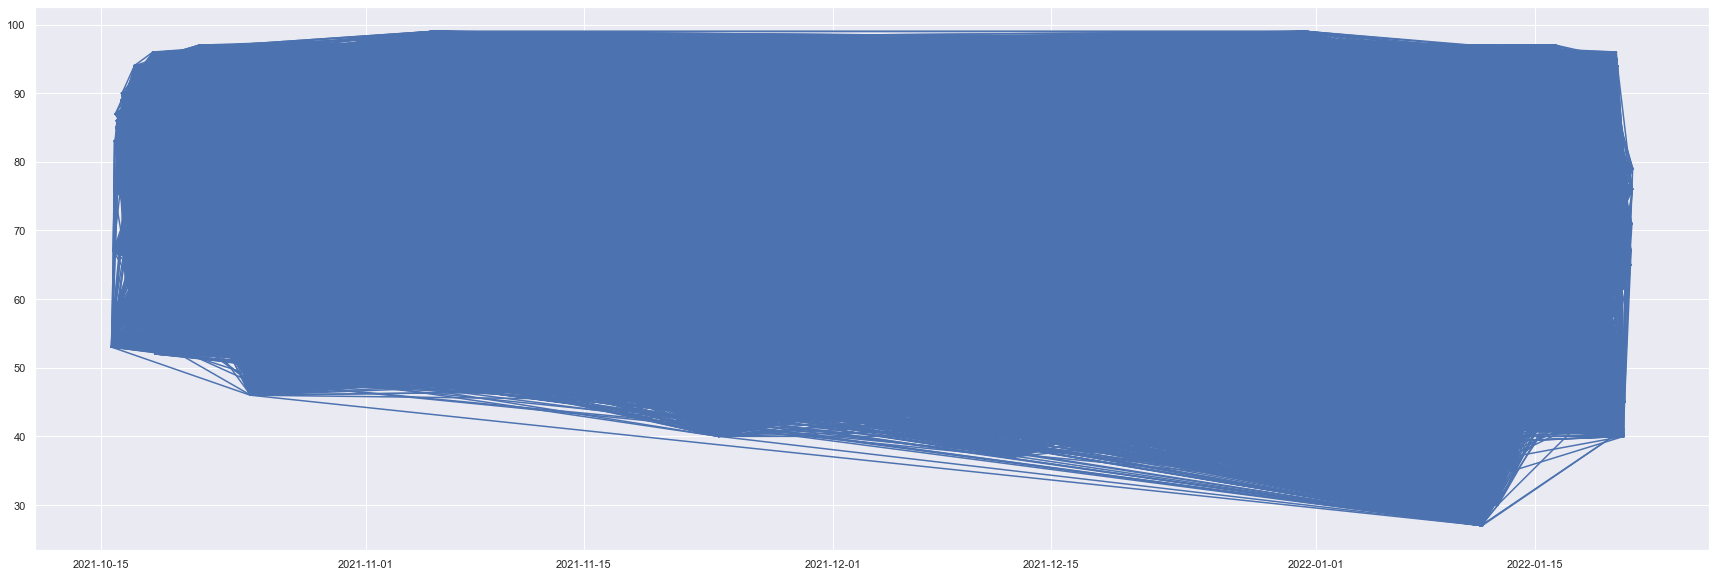

In [23]:
fig, axs = plt.subplots(figsize = (30,10))

axs.plot(train_df['Datetime'], train_df['Relative_Humidity'])


### Target Variable Distribution

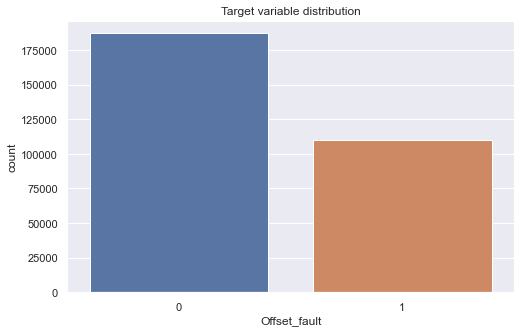

In [9]:
# Target variable distribution
sns.set_style('darkgrid')
plt.figure(figsize=(8, 5))
sns.countplot(x = train_df["Offset_fault"])
plt.title('Target variable distribution')
plt.show()

### Outliers

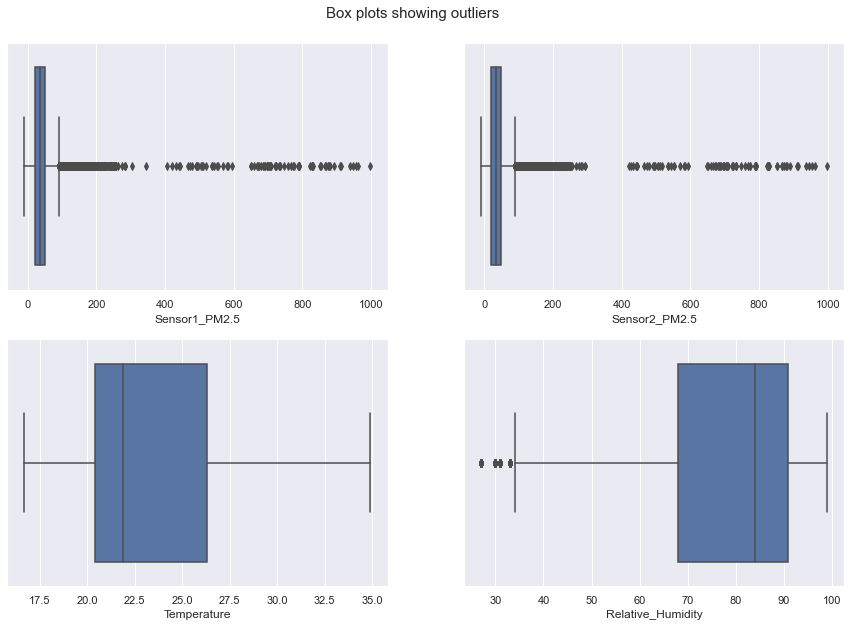

In [8]:
# Plotting boxplots for each of the numerical columns
sns.set_style('darkgrid')
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (15, 10))
fig.suptitle('Box plots showing outliers', y= 0.93, fontsize = 15)

for ax, data, name in zip(axes.flatten(), train_df, ['Sensor1_PM2.5',	'Sensor2_PM2.5',	'Temperature',	'Relative_Humidity']):
  sns.boxplot(x = train_df[name], ax = ax)

### Feature Correlation

# 2. Feature Engineering

### Convert Data types to appropriate formats

### Dealing with Null values

In [138]:
#Fill Null Values.
def fill_na(_df, type='train'):
    df = _df.copy(deep=True)

    if type == 'train':
        df['SENSOR1_PM2.5'] = df['SENSOR1_PM2.5'].fillna(df['SENSOR1_PM2.5'].mean())
        df['SENSOR2_PM2.5'] = df['SENSOR2_PM2.5'].fillna(df['SENSOR2_PM2.5'].mean())
        df['TEMPERATURE'] = df['TEMPERATURE'].fillna(df['TEMPERATURE'].mean())
        df['RELATIVE_HUMIDITY'] = df['RELATIVE_HUMIDITY'].fillna(df['RELATIVE_HUMIDITY'].mean())

    #For the TEST DATA. This is analyzed in the modelling section
    # but this shall be the code to be referenced
    else:
        df['TEMPERATURE'] = df['TEMPERATURE'].fillna(df['TEMPERATURE'].mean())
        df['RELATIVE_HUMIDITY'] = df['RELATIVE_HUMIDITY'].fillna(df['RELATIVE_HUMIDITY'].mean())

    return df


In [139]:
train_df = fill_na(train_df, 'train')

### Dealing with outliers

# 3. Modelling

### Preprocessing Test Data

In [127]:
test_df = prepare_df(raw_test_df)

In [130]:
test_df.shape, test_df.isna().sum()

((127361, 13),
 ID                        0
 DATETIME                  0
 YEAR                      0
 MONTH                     0
 DAY                       0
 DAY_OF_WEEK               0
 HOUR                      0
 HOUR_OF_WEEK              0
 SENSOR1_PM2.5             0
 SENSOR2_PM2.5             0
 TEMPERATURE           88090
 RELATIVE_HUMIDITY     88090
 OFFSET_FAULT         127361
 dtype: int64)

Fill missing values in the dataset

In [133]:
test_df = fill_na(test_df, 'test')

### Model Preparation

#### Import Packages

In [87]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

#Packages for measuring model's accuracy
from sklearn.metrics import  accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

#### Random Forest Classifier

In [147]:
# Splitting the dataset into X & y
X = train_df[[col for col in train_df.columns if col not in\
    ['OFFSET_FAULT', 'ID', 'DATETIME']
    ]]
y = train_df['OFFSET_FAULT']

#Splitting the data into training & testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                        random_state= 42)

# Instantiate the RandomForestClassifier & fit the train data
rfc = RandomForestClassifier(
    max_depth= 8, n_estimators = 8, random_state= 42
)
#Fit the train data
rfc.fit(X_train, y_train)

#Test the model
y_pred = rfc.predict(X_test)

#Calculate the model's accuracy
print(f'Accuracy score: {accuracy_score(y_test, y_pred)}')
print('\n')
print(f'{classification_report(y_test, y_pred)}')



Accuracy score: 0.8552897233999596


              precision    recall  f1-score   support

           0       0.86      0.93      0.89     37442
           1       0.85      0.73      0.79     21994

    accuracy                           0.86     59436
   macro avg       0.86      0.83      0.84     59436
weighted avg       0.86      0.86      0.85     59436



In [135]:
X_train

,YEAR,MONTH,DAY,DAY_OF_WEEK,HOUR,HOUR_OF_WEEK,SENSOR1_PM2.5,SENSOR2_PM2.5,TEMPERATURE,RELATIVE_HUMIDITY
292569,2022,1,7,4,11,107,41.700000,35.600000,29.0,60.000000
153057,2022,1,6,3,22,94,122.530000,103.300000,22.1,80.000000
53209,2021,11,4,3,5,77,38.930000,47.020000,17.8,97.000000
151471,2021,11,27,5,15,135,7.300000,3.900000,28.1,63.000000
68411,2021,12,25,5,3,123,46.770000,39.050000,22.0,88.000000
...,...,...,...,...,...,...,...,...,...,...
119879,2021,11,24,2,11,59,35.770000,28.230000,"<bound method NDFrame._add_numeric_operations.<locals>.mean of 0 17.4\n1 25.0\n2 24.9\n3 24.9\n4 20.9\n ... \n297172 28.6\n297173 21.6\n297174 20.2\n297175 20.6\n297176 17.3\nName: TEMPERATURE, Length: 297177, dtype: float64>",78.653623
259178,2021,12,7,1,7,31,72.980000,60.900000,20.4,93.000000
131932,2021,10,26,1,12,36,15.580000,14.400000,29.4,57.000000
146867,2021,12,27,0,8,8,37.370000,36.100000,19.3,95.000000


#### XG Boost Classifier